# Smoothing VIIRS

In [1]:

# imports
import seaborn as sns
from matplotlib import pyplot as plt
import xarray
import h5py 
import skimage

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# imports
from importlib import reload

from ulmo import io as ulmo_io
import numpy as np
from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

/home/xavier/Projects/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load VIIRS table

In [2]:
viirs_tbl = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet


# Load up a VIIRS cutout

## $LL \approx -400$

In [3]:
idx = np.argmin(np.abs(viirs_tbl.LL + 400.))
cutout = viirs_tbl.iloc[idx]
cutout

filename            s3://viirs/data/2013/317/20131113023000-OSPO-L...
row                                                              1104
col                                                               960
lat                                                         19.923225
lon                                                        -17.835772
clear_fraction                                               0.011068
field_size                                                        192
datetime                                          2013-11-13 02:30:00
ex_filename         s3://viirs/Extractions/VIIRS_2013_95clear_192x...
pp_file             s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...
pp_root                                                     viirs_std
pp_idx                                                         485088
pp_type                                                             0
mean_temperature                                            23.386496
Tmin                

## Grab it

In [4]:
img = image_utils.grab_image(cutout)

## Show

<AxesSubplot:>

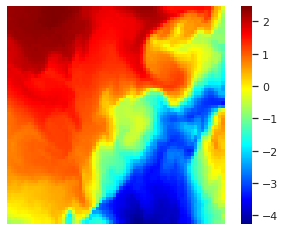

In [6]:
plotting.show_image(img, set_aspect='equal')

## Smooth me

In [7]:
smoothed = skimage.filters.gaussian(img, 3.)

<AxesSubplot:>

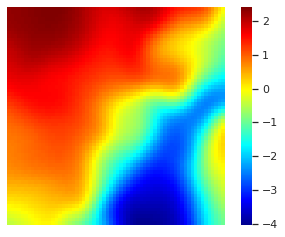

In [8]:
plotting.show_image(smoothed, set_aspect='equal')

# $LL \approx 0$

In [13]:
idx0 = np.argmin(np.abs(viirs_tbl.LL-200))
cutout0 = viirs_tbl.iloc[idx0]
cutout0


filename            s3://viirs/data/2013/022/20130122231000-OSPO-L...
row                                                               912
col                                                               576
lat                                                          43.76727
lon                                                         30.554178
clear_fraction                                               0.002387
field_size                                                        192
datetime                                          2013-01-22 23:10:00
ex_filename         s3://viirs/Extractions/VIIRS_2013_95clear_192x...
pp_file             s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...
pp_root                                                     viirs_std
pp_idx                                                         641318
pp_type                                                             0
mean_temperature                                             8.695506
Tmin                

In [14]:
img0 = image_utils.grab_image(cutout0)

In [15]:
smoothed0 = skimage.filters.gaussian(img0, 3.)

## Plot

<AxesSubplot:>

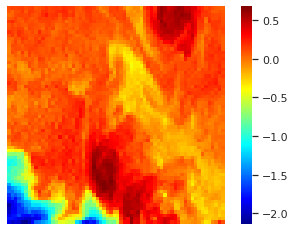

In [16]:
plotting.show_image(img0, set_aspect='equal')

<AxesSubplot:>

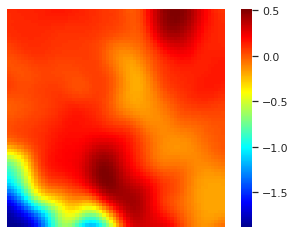

In [17]:
plotting.show_image(smoothed0, set_aspect='equal')

----